In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
test = pd.read_csv('C:/Users/Admin/Documents/test.csv')
train = pd.read_csv('C:/Users/Admin/Documents/train.csv')

In [2]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

%matplotlib inline 
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
#Project Planning:
#Understanding the nature of the data using .info() .describe()
#using histograms and boxplots to understand the relations b/w data points(onlt for numericals)
#value counts for categorical variables, gives a little barchart which tells us what categories people fall into
#missing data (handling it by removing it or imputing it)
#correlation between metrics
#explore interesting themes:
    #did wealthy survive?
    #By location , does location play a part 
    #Age scatterplot with ticket price
    #young and wealthy variable?
    #Total spent?
#feature engineering
#preprocess data together 
    #use label for train and test
#maybe scaling our data

#model baseline 
#model comparision with CV

In [4]:
#Light data exploration
train.info() #Age and cabin have quite a few null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
#separate numercial and categorical values 
df_num = train[['Age', 'Parch', 'SibSp', 'Fare']]
df_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


In [7]:
#histograms (matlplotlib and plotly , just for pratcice)
import plotly.io as pio
pio.renderers.default = 'iframe'
#for some reason couldnt get the graphs in plotly to appear when in a loop so had to do them separately :(
i = df_num.columns[0]  
fig = px.histogram(df_num, x=i, title=i)
fig.show()

In [8]:
i = df_num.columns[1]
fig = px.histogram(df_num, x=i, title=i)
fig.show()

In [9]:
i = df_num.columns[2]
fig = px.histogram(df_num, x=i, title=i)
fig.show()

In [10]:
i = df_num.columns[3]
fig = px.histogram(df_num, x=i, title=i)
fig.show()

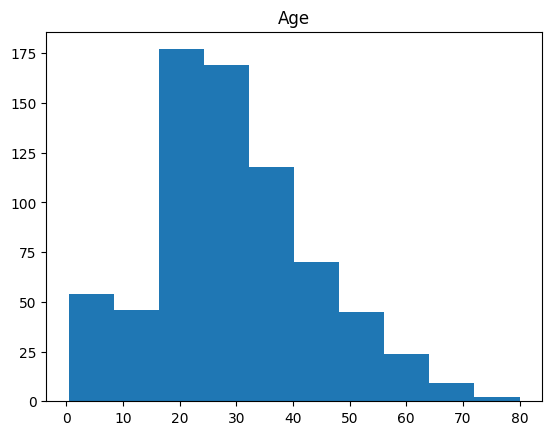

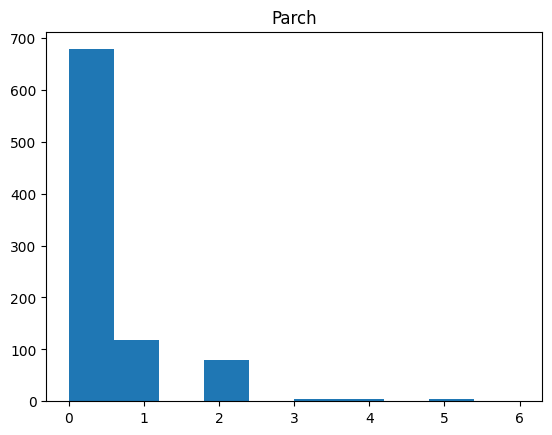

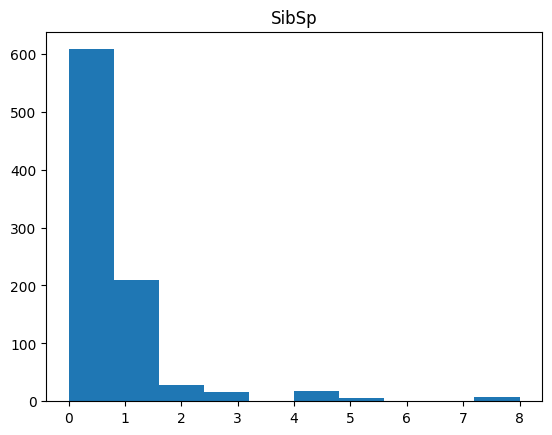

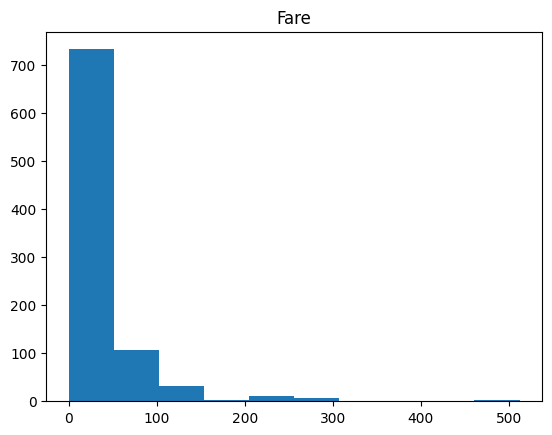

In [11]:
#same as plotly , just for pratcice
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     Parch     SibSp      Fare
Age    1.000000 -0.189119 -0.308247  0.096067
Parch -0.189119  1.000000  0.414838  0.216225
SibSp -0.308247  0.414838  1.000000  0.159651
Fare   0.096067  0.216225  0.159651  1.000000


<Axes: >

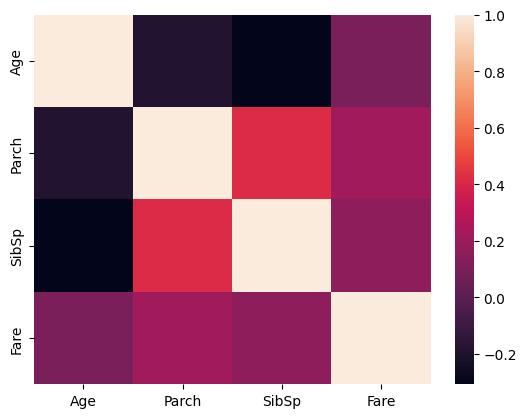

In [12]:
#checking the correlations bw the metrics
print(df_num.corr())
sns.heatmap(df_num.corr())

In [13]:
#average age and other metrics of people who survived and people who didnt (only numeric metrics)
pd.pivot_table(train, index = 'Survived', values = ['Age', 'Parch', 'SibSp', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [14]:
df_cat.value_counts

<bound method DataFrame.value_counts of      Survived  Pclass     Sex            Ticket Cabin Embarked
0           0       3    male         A/5 21171   NaN        S
1           1       1  female          PC 17599   C85        C
2           1       3  female  STON/O2. 3101282   NaN        S
3           1       1  female            113803  C123        S
4           0       3    male            373450   NaN        S
..        ...     ...     ...               ...   ...      ...
886         0       2    male            211536   NaN        S
887         1       1  female            112053   B42        S
888         0       3  female        W./C. 6607   NaN        S
889         1       1    male            111369  C148        C
890         0       3    male            370376   NaN        Q

[891 rows x 6 columns]>

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



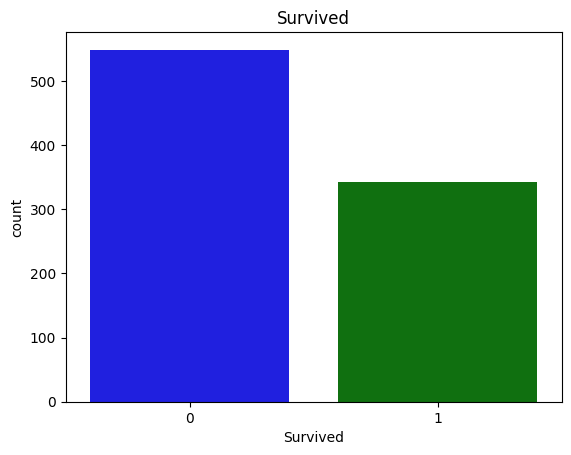

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




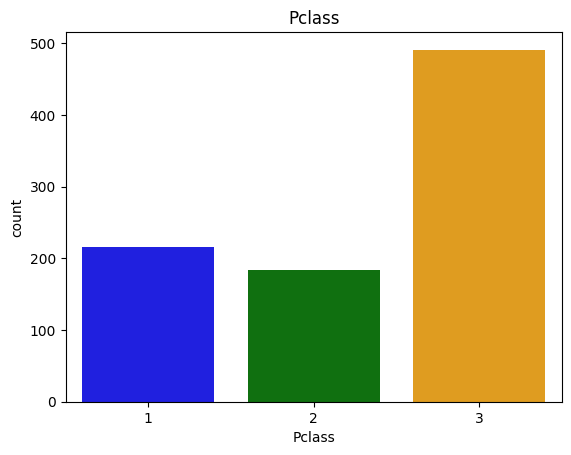

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



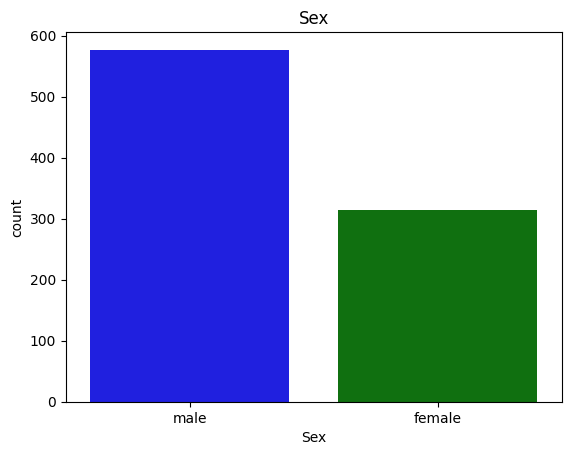

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: UserWarning:


The palette list has fewer values (3) than needed (681) and will cycle, which may produce an uninterpretable plot.



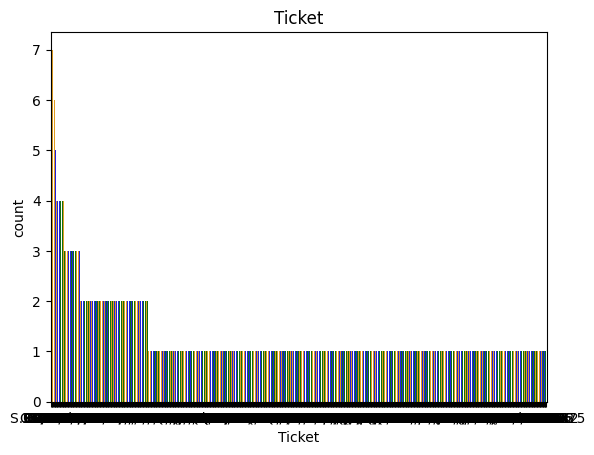

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: UserWarning:


The palette list has fewer values (3) than needed (147) and will cycle, which may produce an uninterpretable plot.



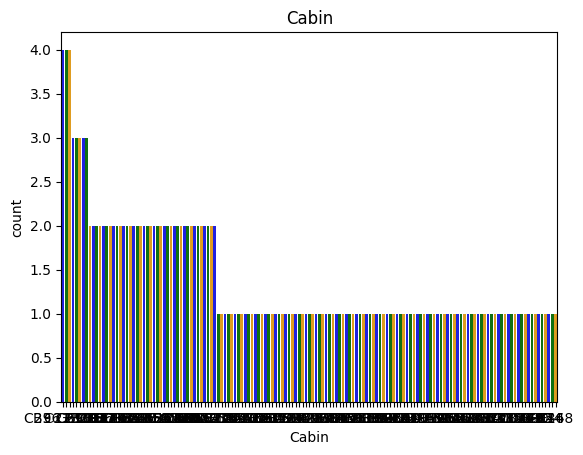

C:\Users\Admin\AppData\Local\Temp\ipykernel_16492\2915357066.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




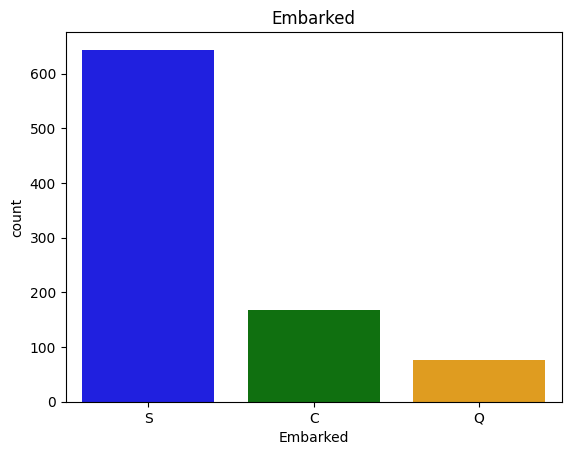

In [15]:
#now we do the same thing as we did for the numericals but now for the categoricals
colors = ['blue', 'green', 'orange']
for i in df_cat.columns:
    value_counts = df_cat[i].value_counts
    sns.barplot(x=value_counts().index, y=value_counts(), palette = colors)
    plt.title(i)
    plt.show()

In [16]:
#comparing survial for each of these variables using similar pivot tables used before
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))
print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [17]:
#Feature Engineering
#1.Cabin - Simplify cabins(evaluated if cabin letter or purchase of tickets across multiple cabins played a role in survival)
#2.Tickts - do different ticket types impact survival rates?
#3.Does a persons title impact survival rates?

In [18]:
df_cat.Cabin.value_counts()
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#after looking at this we may want to look at cabin by letter or by number. lets create some categories for this
#letters 
#multiple letters
train['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [19]:
#surival rate across cabin numbers using pivot table
print(pd.pivot_table(train, index = 'Survived',columns = 'cabin_multiple',  values = 'Ticket', aggfunc = 'count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [20]:
#creates categories based cabin letter (n stands for null)
#null values will have its own category
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
print(train['cabin_adv'].value_counts())
print()
print()
print(pd.pivot_table(train, index = 'Survived', columns ='cabin_adv', values = 'Ticket', aggfunc = 'count'))

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv    A     B     C     D     E    F    G    T      n
Survived                                                    
0          8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1          7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


In [21]:
#understanding the tickets better 
#numeric vs non numeric (letter)
train['numeric_ticket'] = train.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
train['letter_ticket'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1])>0 else 0)
train.numeric_ticket.value_counts()

numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [22]:
#lets us view all of the rows in the dataframe through srolling. This is for convenience
train['letter_ticket'].value_counts()

letter_ticket
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [23]:
#survival rates numeric vs non numeric tickets using pivot tables
print(pd.pivot_table(train, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count'))

numeric_ticket    0    1
Survived                
0               142  407
1                88  254


In [24]:
#survival rates across differnt ticket types
pd.pivot_table(train, index = 'Survived', columns = 'letter_ticket', values = 'Ticket', aggfunc = 'count')

letter_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [25]:
#feature engineering on persons name 
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [26]:
#survial rates with respect to name titles
pd.pivot_table(train, index = 'Survived', columns = 'name_title', values = 'Ticket', aggfunc = 'count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [27]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'letter_ticket',
       'name_title'],
      dtype='object')

In [28]:
#DATA PRE-PROCESSING FOR MODEL:
#1.Drop the null values from embarked(only 2)- because the model doesnt handle null data well.
#2.Include only relevant variables for our model to deal with (removed features like Name, passangerID)
    #included- 'Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked','cabin_multiple', 'cabin_adv','numeric_ticket','name_title'
#3.Transform our data using one-hot encoding
#4.impute(replace missing values with other data) data with mean for Age and Fare(should also experiment with median)
#5.Normalized fare using logarithm to make it look like a normalized distribution
#6.Scale data 0-1 with standard scaler

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'letter_ticket',
       'name_title', 'norm_sibsp', 'norm_fare'],
      dtype='object')

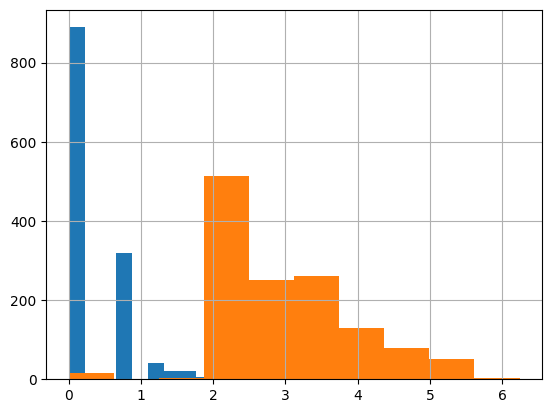

In [52]:
#create all categorical variables that we did above with train and test data but now for all of the data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x : 1 if x.isnumeric() else 0)
all_data['letter_ticket'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1])>0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#imputing Age and fare with mean
all_data.Age = all_data.Age.fillna(train.Age.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.mean()) #in theory shoulve used median for fare as its not normally distributed

#drop the rows with null values in embarked(only 2 such rows in training set and 0 in test set)
all_data.dropna(subset = ['Embarked'], inplace = True)

#tried log normalization of sibsp(didnt use)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

#for fare also(used) because this looked more normalized than sibsp
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories(can also use one-hot encoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked','cabin_multiple','norm_fare','cabin_adv','numeric_ticket','name_title', 'train_test']])

#split all data to train, test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived
y_train.shape

all_data.columns

In [53]:
# Scale the data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [31]:
#MODEL BUILDING(BASELINE VALIDATION PERFORMANCE)
#so used a bunch of different models to see how they perform with default parameters.
#used the following:
#Naive bayes(73% acc)
#logistic regression(82% acc)
#decision tree(78% acc)
#K nearest neighbor(71% acc)
#random forest(79% acc)
#support vector classifier(66% acc)
#xtreme gradient boosting(81.6% acc)
#soft voting classifier(81.4% acc)-all models

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.68539326 0.70786517 0.7752809  0.75842697 0.75706215]
0.7368056878054973


In [34]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.79775281 0.82022472 0.85310734]
0.8200596711737447


In [35]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cv = cross_val_score(dt,X_train_scaled,y_train, cv = 5)
print(cv)
print(cv.mean())

[0.73033708 0.74719101 0.84269663 0.76404494 0.83615819]
0.7840855710023488


In [36]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.67977528 0.70224719 0.73033708 0.73595506 0.74011299]
0.7176855202183711


In [37]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.76404494 0.85393258 0.73033708 0.81920904]
0.7953024820669079


In [38]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.57865169 0.71348315 0.67977528 0.68539326 0.68361582]
0.6681838379991113


In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.79775281 0.85955056 0.79775281 0.81355932]
0.8166444486764426


In [40]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7752809  0.80337079 0.84831461 0.80898876 0.83615819]
0.8144226496540341


In [41]:
#TUNING THE MODEL'S PERFORMANCE
#mainly used grid search to tune the models, also used Randomized search for the random forest and XG boosted model to simplify testing time.
#     model       Baseline       Tuned
# Naive bayes    (73% acc)       -
#logistic regression(82% acc)    82.5%
#decision tree   (78% acc)       -
#K nearest neighbor(71% acc)     79.6%
#random forest   (79% acc)       83.5%
#svc             (66% acc)       82.2%
#xg boosted      (81.6% acc)     84.8%

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [43]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score:' + str(classifier.best_score_))
    print('Best Parameters:' + str(classifier.best_params_))

In [44]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv= 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score:0.8256839966990415
Best Parameters:{'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score:0.7964387735669397
Best Parameters:{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [46]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 44 candidates, totalling 220 fits
SVC
Best Score:0.8222941661905668
Best Parameters:{'C': 0.1, 'kernel': 'linear'}


In [48]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 

# rf = RandomForestClassifier(random_state = 1)
# param_grid =  {'n_estimators': [100,500,1000], 
#                                   'bootstrap': [True,False],
#                                   'max_depth': [3,5,10,20,50,75,100,None],
#                                   'max_features': ['auto','sqrt'],
#                                   'min_samples_leaf': [1,2,4,10],
#                                   'min_samples_split': [2,5,10]}
                                  
# clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
# best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
# clf_performance(best_clf_rf_rnd,'Random Forest')

In [49]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
289 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Random Forest
Best Score:0.8357900082523964
Best Parameters:{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 450}


<Axes: >

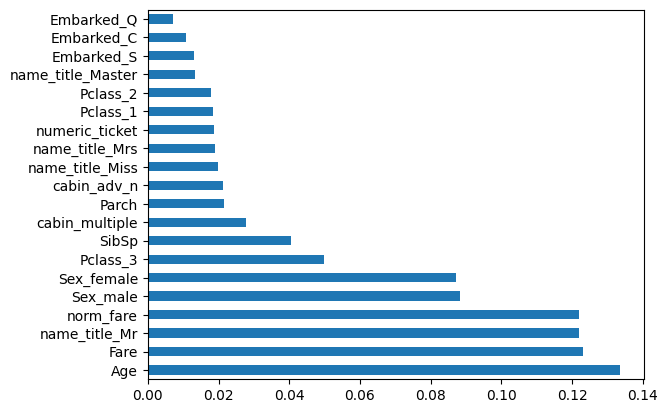

In [55]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [57]:
# xgb = XGBClassifier(random_state = 1)

# param_grid = {
#     'n_estimators': [20, 50, 100, 250, 500,1000],
#     'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
#     'max_depth': [2, 5, 10, 15, 20, 25, None],
#     'reg_alpha': [0, 0.5, 1],
#     'reg_lambda': [1, 1.5, 2],
#     'subsample': [0.5,0.6,0.7, 0.8, 0.9],
#     'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
#     'gamma':[0,.01,.1,1,10,100],
#     'min_child_weight':[0,.01,0.1,1,10,100],
#     'sampling_method': ['uniform', 'gradient_based']
# }

# #clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
# #best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
# #clf_performance(best_clf_xgb,'XGB')
# clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
# best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
# clf_performance(best_clf_xgb_rnd,'XGB')

In [58]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score:0.848162254808608
Best Parameters:{'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [61]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)
submission_xgb

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Model Additional Ensemble Approaches
# 1) Experimented with a hard voting classifier of three estimators (KNN, SVM, RF) (82.7%)

# 2) Experimented with a soft voting classifier of three estimators (KNN, SVM, RF) (82.2%)

# 3) Experimented with soft voting on all estimators performing better than 80% except xgb (KNN, RF, LR, SVC)(82.4%)

# 4) Experimented with soft voting on all estimators including XGB (KNN, SVM, RF, LR, XGB)(84.02%)

In [62]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.85393258 0.79775281 0.84269663 0.79775281 0.84745763]
voting_clf_hard mean : 0.8279184917158636
voting_clf_soft : [0.83707865 0.79775281 0.81460674 0.80337079 0.85875706]
voting_clf_soft mean : 0.8223132101821875
voting_clf_all : [0.81460674 0.80898876 0.81460674 0.80898876 0.87570621]
voting_clf_all mean : 0.8245794451850441
voting_clf_xgb : [0.85955056 0.82022472 0.83707865 0.81460674 0.86440678]
voting_clf_xgb mean : 0.840297086269282


In [72]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [74]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)
comparison

,PassengerId,Survived_vc_hard,Survived_rf,Survived_vc_soft,Survived_vc_all,Survived_vc_xgb
0,892,0,0,0,0,0
1,893,1,0,1,1,0
2,894,0,0,0,0,0
3,895,0,0,0,0,0
4,896,1,1,1,1,1
...,...,...,...,...,...,...
413,1305,0,0,0,0,0
414,1306,1,1,1,1,1
415,1307,0,0,0,0,0
416,1308,0,0,0,0,0


In [75]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [76]:
comparison.difference_hard_all.value_counts()

difference_hard_all
0    397
1     21
Name: count, dtype: int64